In [1]:
!which python

/mnt/hdd2/fabian/miniconda3/envs/f110/bin/python


In [2]:
# import gymnasium as gym
# import tensorflow as tf
import f110_gym

In [29]:
# reimport f110_gym
import importlib
import f110_gym.envs.datatset_env


In [30]:
import matplotlib.pyplot as plt

In [95]:
importlib.reload(f110_gym.envs.datatset_env)
from f110_gym.envs.datatset_env import F1tenthDatasetEnv
# from f110_gym.envs.base_classes import Integrator

In [96]:
F110Env = F1tenthDatasetEnv("test",dict(), 
                            # as_trajectories=True,
                            flatten_obs=True,
                            flatten_acts=True,
                            laser_obs=False,
                            flatten_trajectories=True,
                            subsample_laser=10,
                            max_trajectories = 5,
                            )
trajectories = F110Env.get_dataset(zarr_path="/mnt/hdd2/fabian/f1tenth/f1tenth_orl_datasets/collect_dataset/trajectories.zarr",)


/mnt/hdd2/fabian/f1tenth/f1tenth_orl_datasets/collect_dataset/trajectories.zarr
dict_keys(['rewards', 'terminals', 'timeouts', 'progress', 'infos', 'actions', 'obs_keys', 'observations'])
(6, 2438)
dict_keys(['rewards', 'terminals', 'timeouts', 'progress', 'infos', 'actions', 'obs_keys', 'observations'])


(6, 2438)


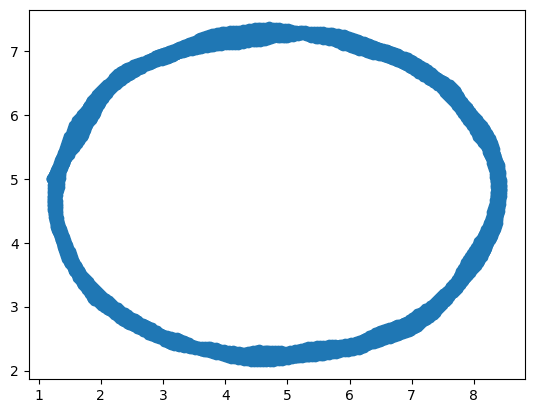

In [97]:
# plot scatter plot of the last two observations
print(trajectories['observations'].shape)
plt.scatter(trajectories['observations'][4,:], trajectories['observations'][5,:])

In [98]:
trajectories["actions"].shape

(2, 2438)

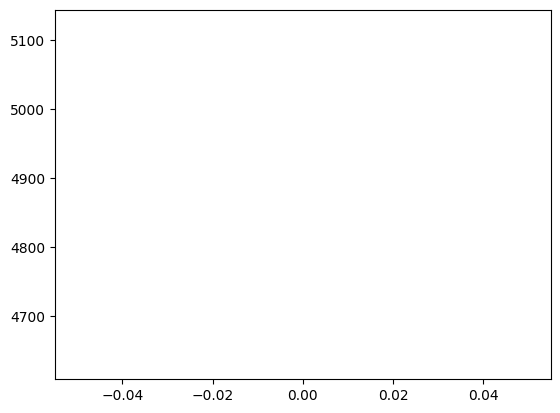

In [90]:
plt.plot(trajectories["actions"].shape)

In [20]:
print(trajectories[0]["obs_keys"])

['ang_vels_z', 'linear_vel_x', 'linear_vel_y', 'pose_theta', 'pose_x', 'pose_y']


In [21]:

len(trajectories[0]["scan"])

KeyError: 'scan'

In [24]:
print(trajectories[2]["observations"].shape)

(6, 213)


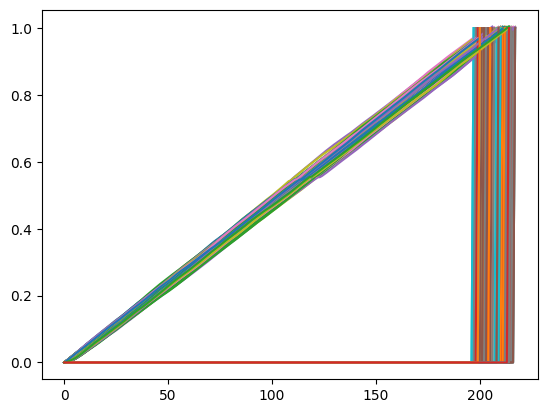

In [25]:
# plot the progress
for trajectory in trajectories:
    plt.plot(trajectory['progress'])
    plt.plot(trajectory['terminals'])
    # print the last 10 progress and terminals
    #break
plt.show()

dict_keys(['rewards', 'terminals', 'progress', 'infos', 'obs_keys', 'observations'])


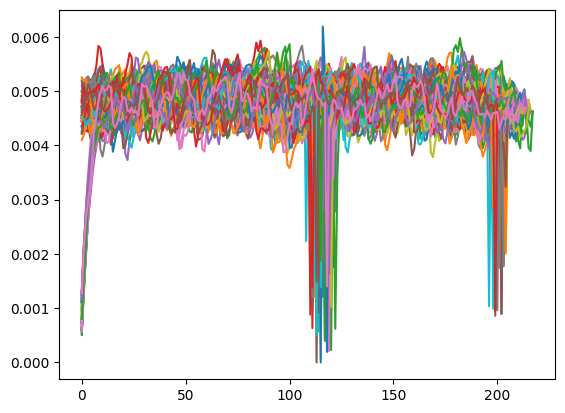

97


In [26]:
print(trajectories[0].keys())
# print(trajectories[0]['rewards'])
# plot all rewards
for trajectory in trajectories:
    plt.plot(trajectory['rewards'])
    #plt.plot(trajectory['terminals']*0.05)
plt.show()
print(len(trajectories))


In [27]:
print(trajectories[0]["infos"])

{'agent': array(['StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticFTGAgent', 'StochasticFTGAgent',
       'StochasticFTGAgent', 'StochasticF

In [28]:
trajectories[0]['observations'].shape

(6, 210)

In [29]:
F110Env.flatten_obs

True

In [45]:
len(F110Env.dataset['infos'])

0

In [48]:
len(F110Env.dataset['terminals'])

2070

In [49]:
len(F110Env.dataset['rewards'])

2070

In [50]:
len(F110Env.dataset['observations'])

2070

In [51]:
len(F110Env.dataset['actions'])

2070

In [52]:
# print the type of the actions
type(F110Env.dataset['actions'][0][1])


tensorflow.python.framework.ops.EagerTensor

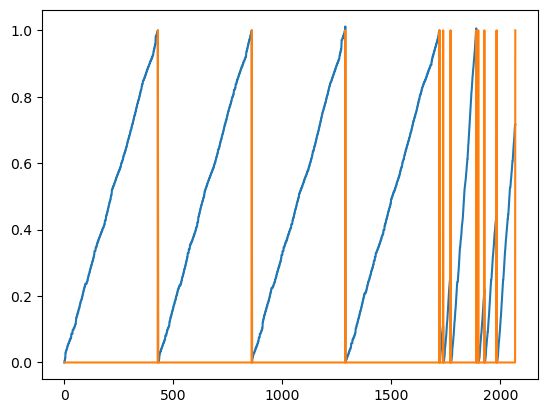

In [53]:
# plot rewards and done
import matplotlib.pyplot as plt
plt.plot(F110Env.dataset["rewards"])
plt.plot(F110Env.dataset["terminals"])
plt.show()

In [54]:
import numpy as np

In [55]:
trajectories = np.split(F110Env.dataset['rewards'], np.where(F110Env.dataset['terminals'])[0]+1)[0:-1]

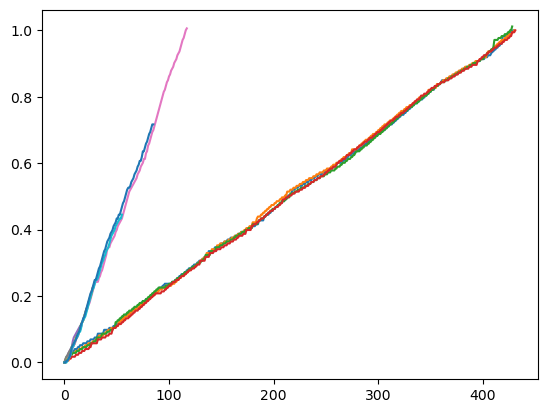

In [56]:
for tra in trajectories:
    plt.plot(tra)
plt.show()

The reward looks boring because the map is boring and the speed is (close to) constant

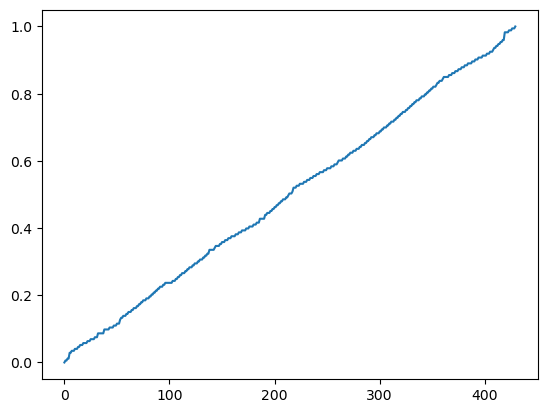

reward 21.890263787372696
430


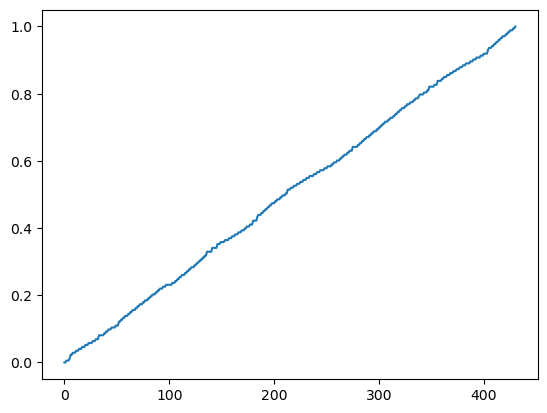

reward 21.604499153296178
431


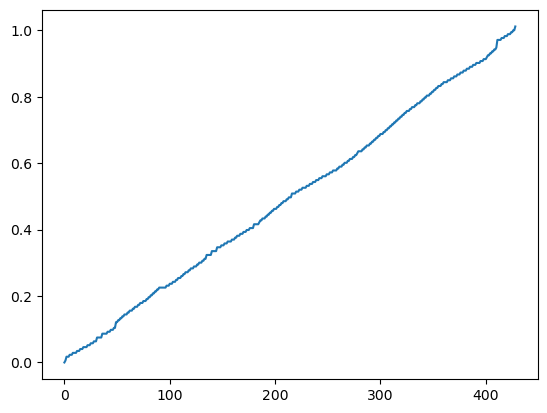

reward 21.566338672856265
429


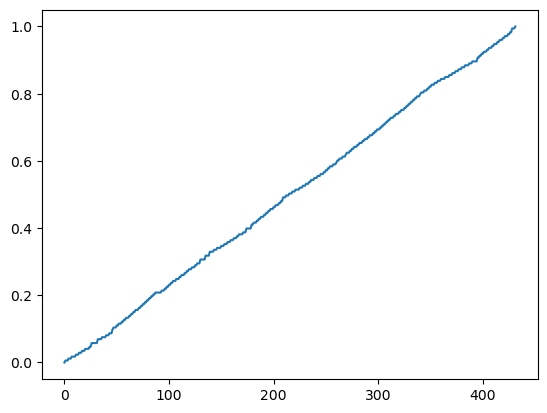

reward 20.918273791234483
432


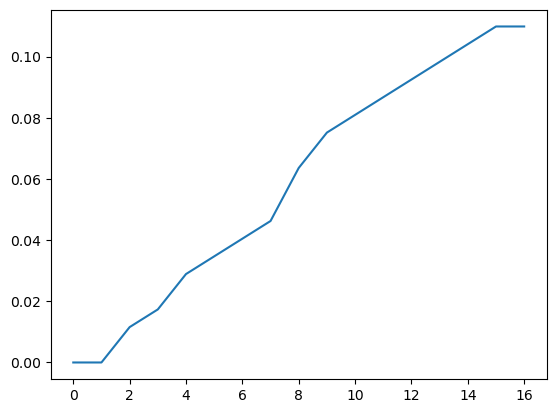

reward 0.8948004985880363
17


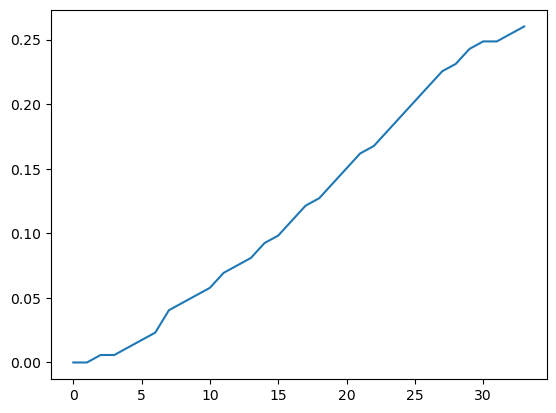

reward 3.289173740561641
34


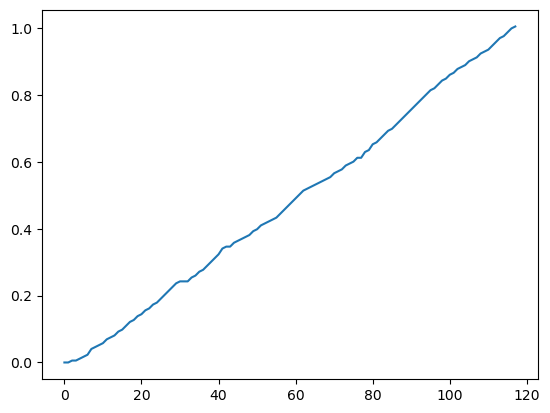

reward 26.51270870314543
118


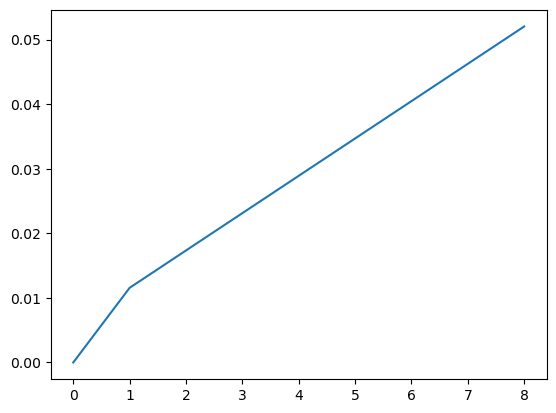

reward 0.24082082328505325
9


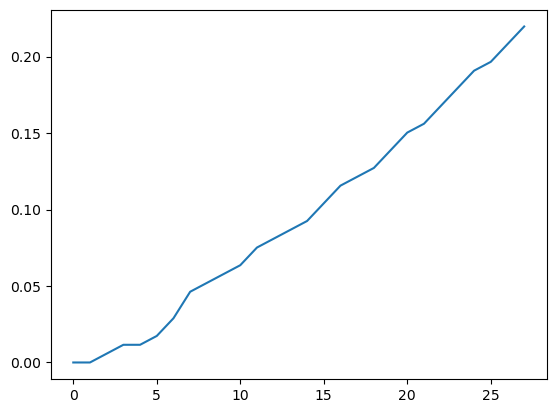

reward 2.2358335356552264
28


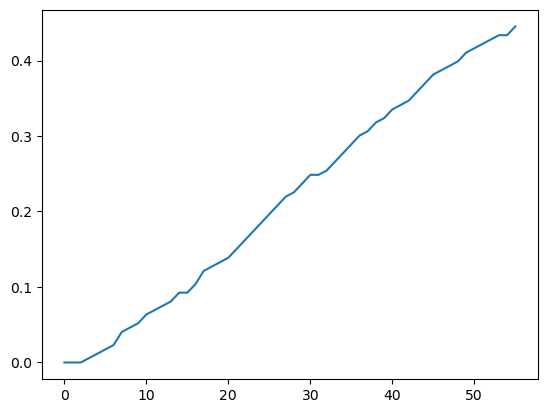

reward 8.37765032751011
56


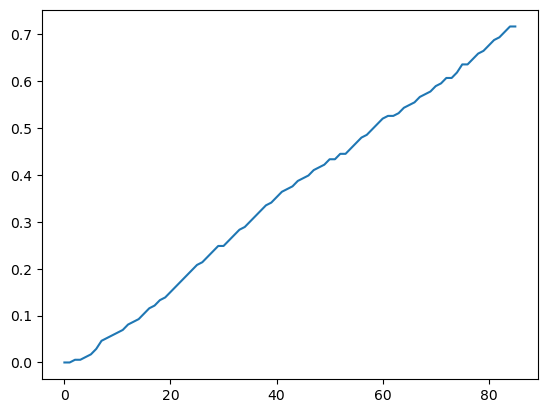

reward 17.541514439875893
86


In [59]:
# calculate reward for each tra
gamma = 0.99  # discount factor

for rewards in trajectories:
    discounted_rewards = np.zeros_like(rewards, dtype=np.float32)
    cumulative_rewards = 0

    for i in reversed(range(len(rewards))):
        cumulative_rewards = rewards[i] + gamma * cumulative_rewards
        discounted_rewards[i] = cumulative_rewards
    plt.plot(rewards)
    plt.show()
    print(f"reward {cumulative_rewards}")
    print(len(rewards))